### Simulações de Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rev_m = 170
rev_stdev =20
iterations = 1000

In [3]:
rev = np.random.normal(rev_m,rev_stdev,iterations)
rev

array([167.07701227, 170.47511009, 151.6238539 , 147.40438737,
       148.3936323 , 199.49040426, 140.97824772, 122.30282006,
       159.68049537, 162.98273283, 178.49842804, 188.14279476,
       159.8137221 , 154.98634627, 142.20899644, 171.84917271,
       194.73918327, 138.8157325 , 157.03011004, 133.33292547,
       163.54594267, 180.13100048, 198.92933373, 175.14736199,
       183.92990863, 191.31760442, 185.68898502, 193.32121604,
       186.77263297, 192.87469923, 184.86647312, 161.03263407,
       143.62285464, 171.71982851, 181.09552095, 157.57040729,
       168.50895849, 168.38563681, 167.16407387, 166.77023231,
       172.62177125, 204.63560591, 179.56696812, 178.53834812,
       160.48842425, 204.23049985, 187.21184472, 142.91902686,
       169.9495111 , 179.35847599, 170.82013981, 161.63940369,
       155.26199212, 138.73323851, 167.57902329, 182.35412838,
       187.61537929, 162.47630658, 186.48619245, 165.03107236,
       161.03388468, 152.36394089, 150.44769454, 175.07

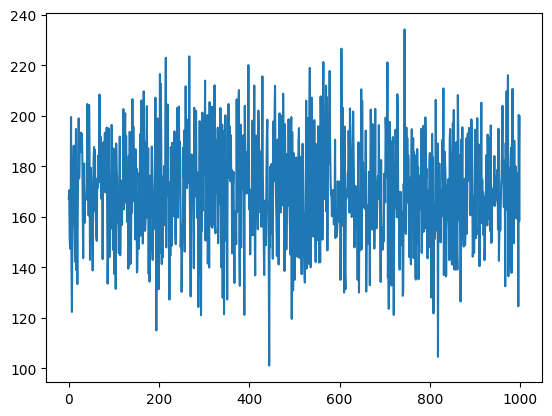

In [4]:
plt.Figure(figsize=(15,6))
plt.plot(rev)
plt.show()

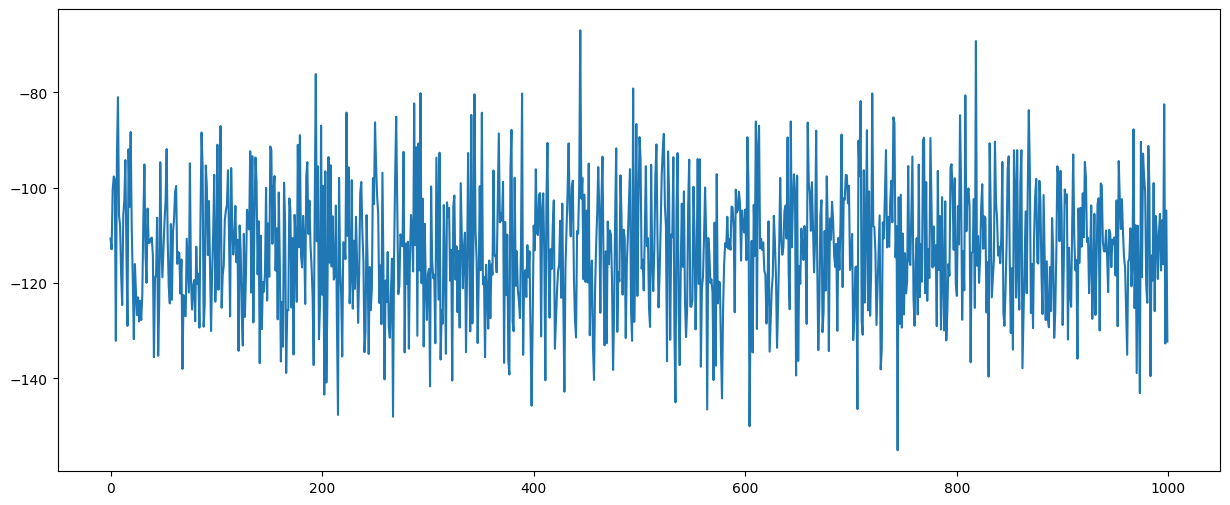

In [5]:
COGS = - (rev * np.random.normal(0.6,0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [6]:
COGS.mean()

-112.81566189257364

In [7]:
COGS.std()

13.50232092784412

Agora vamos calcular o lucro bruto.

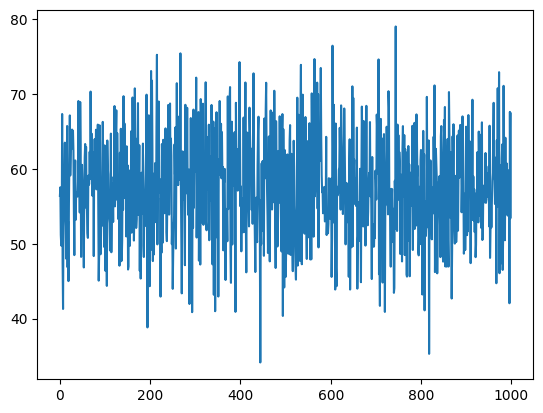

In [8]:
Gross_Profit = rev + COGS
Gross_Profit

plt.Figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [9]:
max(Gross_Profit)

79.06032646285385

In [10]:
min(Gross_Profit)

34.14458187745937

In [11]:
Gross_Profit.mean()

57.51586128679647

In [12]:
Gross_Profit.std()

6.883774863415598

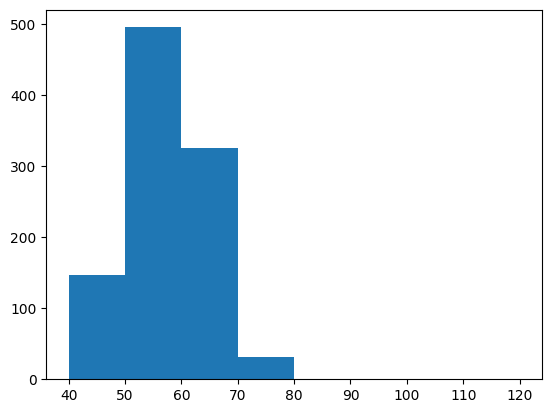

In [13]:
plt.Figure(figsize=(16,10))
plt.hist(Gross_Profit, bins = [40,50,60,70,80,90,100,110,120])
plt.show()

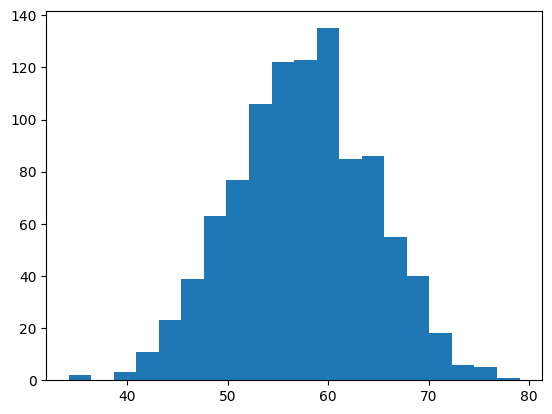

In [14]:
plt.Figure(figsize=(10,6))
plt.hist(Gross_Profit, bins = 20)
plt.show()

Previsão de preço de uma ação.

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf

In [16]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download (ticker, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [17]:
log_returns = np.log(1 + data.pct_change())

In [18]:
log_returns.tail()

,PG
Date,
2024-12-26,0.007196
2024-12-27,-0.003709
2024-12-30,-0.014497
2024-12-31,0.003346
2025-01-02,-0.010011


<Axes: xlabel='Date'>

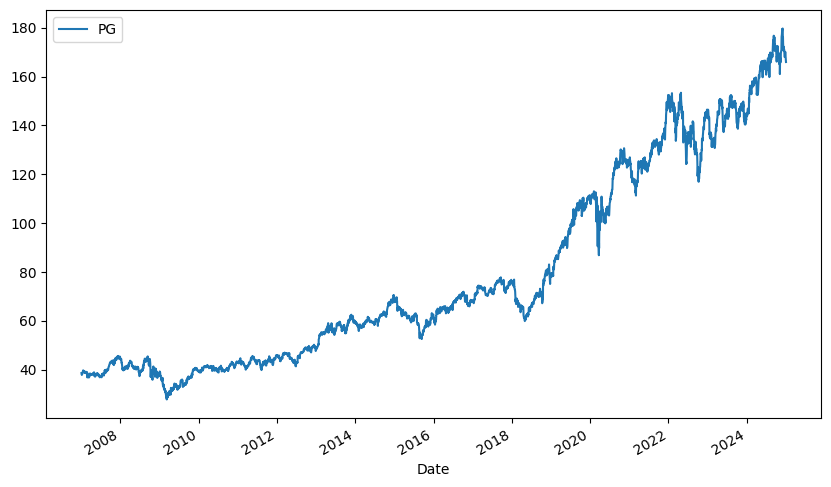

In [19]:
data.plot(figsize=(10,6))

<Axes: xlabel='Date'>

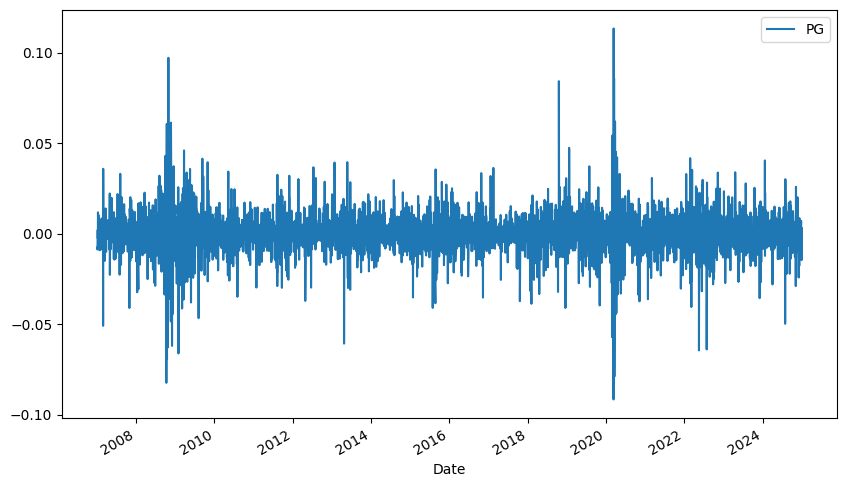

In [20]:
log_returns.plot(figsize=(10, 6))

In [21]:
u = log_returns.mean()
u

PG    0.000322
dtype: float64

In [22]:
var = log_returns.var()
var

PG    0.000135
dtype: float64

In [23]:
drift = u - (0.5 * var)
drift

PG    0.000254
dtype: float64

In [24]:
stdev = log_returns.std()
stdev

PG    0.011612
dtype: float64

In [25]:
type(drift)

pandas.core.series.Series

In [26]:
type(stdev)

pandas.core.series.Series

Converter em array

In [27]:
np.array(drift)

array([0.00025447])

In [28]:
drift.values

array([0.00025447])

In [29]:
stdev.values

array([0.01161246])

In [30]:
norm.ppf(0.95)

1.6448536269514722

In [31]:
x = np.random.rand(10,2)
x

array([[0.86534277, 0.53082969],
       [0.51231052, 0.68469219],
       [0.06471664, 0.31551128],
       [0.79356797, 0.0737916 ],
       [0.94646627, 0.7852273 ],
       [0.21084461, 0.67686312],
       [0.75577938, 0.78346859],
       [0.34103209, 0.25120089],
       [0.0235583 , 0.30892633],
       [0.0411572 , 0.93945799]])

In [32]:
norm.ppf(x)

array([[ 1.10464267,  0.07735566],
       [ 0.0308628 ,  0.48086054],
       [-1.51634052, -0.48028807],
       [ 0.8188639 , -1.44812102],
       [ 1.61151524,  0.7899698 ],
       [-0.80349408,  0.45894487],
       [ 0.69279018,  0.78396131],
       [-0.40964801, -0.67071551],
       [-1.98525057, -0.498896  ],
       [-1.73741242,  1.55023961]])

In [33]:
z= norm.ppf(np.random.rand(10,2))
z

array([[-0.58286193, -0.83671175],
       [ 2.95245464, -1.32378366],
       [ 0.22737385,  1.7631032 ],
       [ 0.63268345, -0.03782256],
       [ 0.06256839, -0.90846536],
       [ 0.4496834 , -0.04664195],
       [ 0.93190783, -0.10690274],
       [ 0.21605562, -0.90248246],
       [-0.1783492 , -1.92902269],
       [ 0.36839328, -0.70825572]])

In [34]:
t_intervals = 1000
iterations = 10

In [35]:
daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [36]:
daily_return

array([[1.00744556, 0.99119873, 0.99211943, ..., 1.00155087, 0.99869722,
        0.99818815],
       [1.01433584, 1.00243812, 0.98259694, ..., 1.0033581 , 0.98737184,
        0.9935966 ],
       [1.02193784, 1.00171816, 1.00209186, ..., 1.0101311 , 0.97241653,
        0.98790823],
       ...,
       [0.99126241, 1.02611625, 0.98524668, ..., 0.97638571, 1.01150605,
        1.00806847],
       [1.00161087, 1.01372861, 1.01448248, ..., 1.00373163, 0.9906704 ,
        1.00221994],
       [0.98419119, 1.00409603, 1.00619767, ..., 1.00169277, 1.00163693,
        0.98813842]])

Agora vamos criar uma lista de preços

In [37]:
S0 = data.iloc[-1]
S0

PG    165.979996
Name: 2025-01-02 00:00:00, dtype: float64

In [38]:
price_list = np.zeros_like(daily_return)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
price_list[0] = S0
price_list

array([[165.97999573, 165.97999573, 165.97999573, ..., 165.97999573,
        165.97999573, 165.97999573],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [40]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_return[t]

price_list

array([[165.97999573, 165.97999573, 165.97999573, ..., 165.97999573,
        165.97999573, 165.97999573],
       [168.35945762, 166.38467472, 163.09143581, ..., 166.53737269,
        163.88397366, 164.91715978],
       [172.05290018, 166.67055092, 163.43260071, ..., 168.22457924,
        159.36348568, 162.92301893],
       ...,
       [156.39083886, 367.40104901, 159.30803523, ..., 170.35592628,
        172.92808228, 375.61234081],
       [156.64276405, 372.44495643, 161.61521018, ..., 170.99163231,
        171.31473265, 376.44617876],
       [154.1664291 , 373.97050223, 162.61684803, ..., 171.28108182,
        171.59516287, 371.98093315]])

Plotar o grafico de previsão do preço

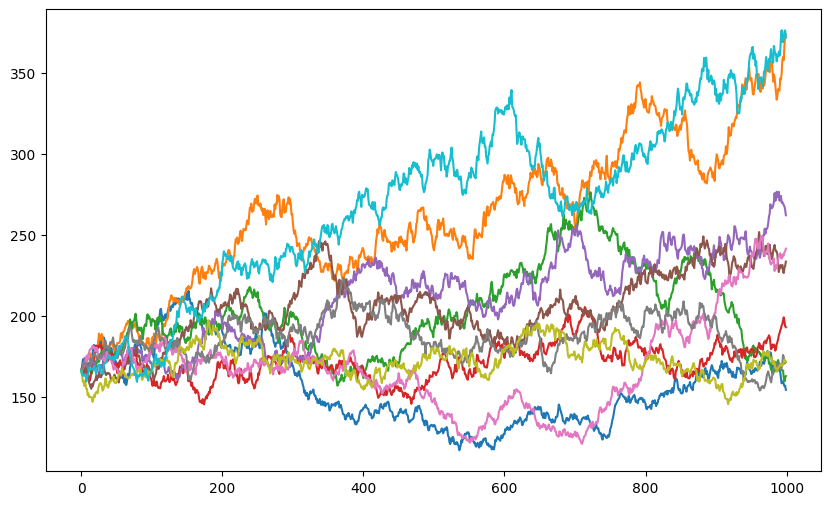

In [41]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

Agora vamos calcular o preço de opção de compra. 
o BLACK-SCHOLES-MERTON

In [42]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

In [43]:
def d1 (S, K, r, stdev, T):
    return (np.log(S/K) + (r + stdev ** 2/2) * T) / (stdev * np.sqrt(T))

def d2 (S, K, r, stdev, T):
    return (np.log(S/K) + (r - stdev ** 2/2) * T) / (stdev * np.sqrt(T))

In [44]:
norm.cdf(0)

0.5

In [45]:
norm.cdf(0.25)

0.5987063256829237

In [46]:
norm.cdf(0.75)

0.7733726476231317

In [47]:
norm.cdf(9)

1.0

In [48]:
def BSM (S,K,r,stdev,T):
    return (S * norm.cdf(d1(S,K,r,stdev,T)))  - (K * np.exp(- r *T) * norm.cdf(d2(S,K,r,stdev,T)))

In [49]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

ticker = 'PG'
data = pd.DataFrame()

data[ticker] = yf.download(ticker, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [50]:
S = data.iloc[-1]
S

PG    165.979996
Name: 2025-01-02 00:00:00, dtype: float64

In [51]:
log_return = np.log(1+ data.pct_change())

In [52]:
stdev = log_return.std() * 250 ** 0.5
stdev

PG    0.183609
dtype: float64

In [53]:
r= 0.025
K = 110.0
T = 1

In [54]:
d1(S,K,r,stdev,T)

PG    2.468521
dtype: float64

In [55]:
d2(S,K,r,stdev,T)

PG    2.284912
dtype: float64

In [56]:
BSM(S,K,r,stdev,T)

PG    58.767141
Name: 2025-01-02 00:00:00, dtype: float64

### Monte Carlo: Discretização de Euler

In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

ticker = 'PG'
data = pd.DataFrame()

data[ticker] = yf.download(ticker, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [58]:
log_returns = np.log ( 1 + data.pct_change())

In [59]:
r = 0.025

In [60]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.183609
dtype: float64

In [61]:
type(stdev)

pandas.core.series.Series

In [62]:
stdev = stdev.values
stdev

array([0.18360908])

In [63]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

Trabalhar com a previsão de um ano nos preços

In [64]:
z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(z)
S0 = data.iloc[-1]
S[0] = S0

In [65]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev *delta_t ** 0.5 * z[t])

In [66]:
S

array([[165.97999573, 165.97999573, 165.97999573, ..., 165.97999573,
        165.97999573, 165.97999573],
       [164.3589636 , 169.05595711, 163.16074098, ..., 166.49439615,
        165.64020352, 167.8341303 ],
       [163.0844463 , 170.32887478, 163.96685401, ..., 164.25348571,
        163.70405636, 165.37291968],
       ...,
       [159.57286526, 191.51461345, 216.35056805, ..., 173.991892  ,
        137.83286861, 102.49931221],
       [163.0409586 , 188.78304699, 216.35139364, ..., 173.1166303 ,
        137.78914094, 103.47592625],
       [158.55190656, 190.47847698, 220.1476356 , ..., 175.46529715,
        138.15186174, 104.32523724]])

In [67]:
S.shape

(251, 10000)

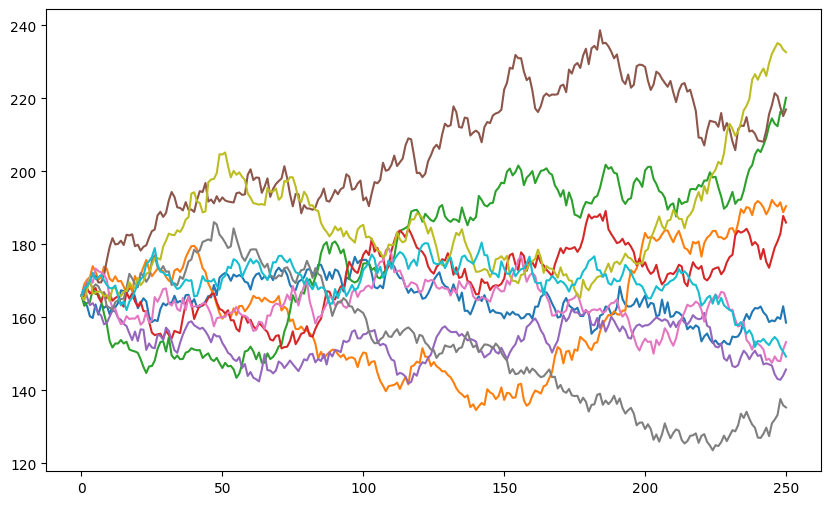

In [68]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])

Agora vamos calcular o preço de opção de compra.

In [69]:
p = np.maximum(S[-1] - 110,0)
p

array([ 48.55190656,  80.47847698, 110.1476356 , ...,  65.46529715,
        28.15186174,   0.        ])

In [70]:
p.shape

(10000,)

In [71]:
c= np.exp( -r * T) * np.sum(p) / iterations
c

58.65730078698366